/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_48362/1489803853.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')


Missing parties in the orientation dictionary: set()


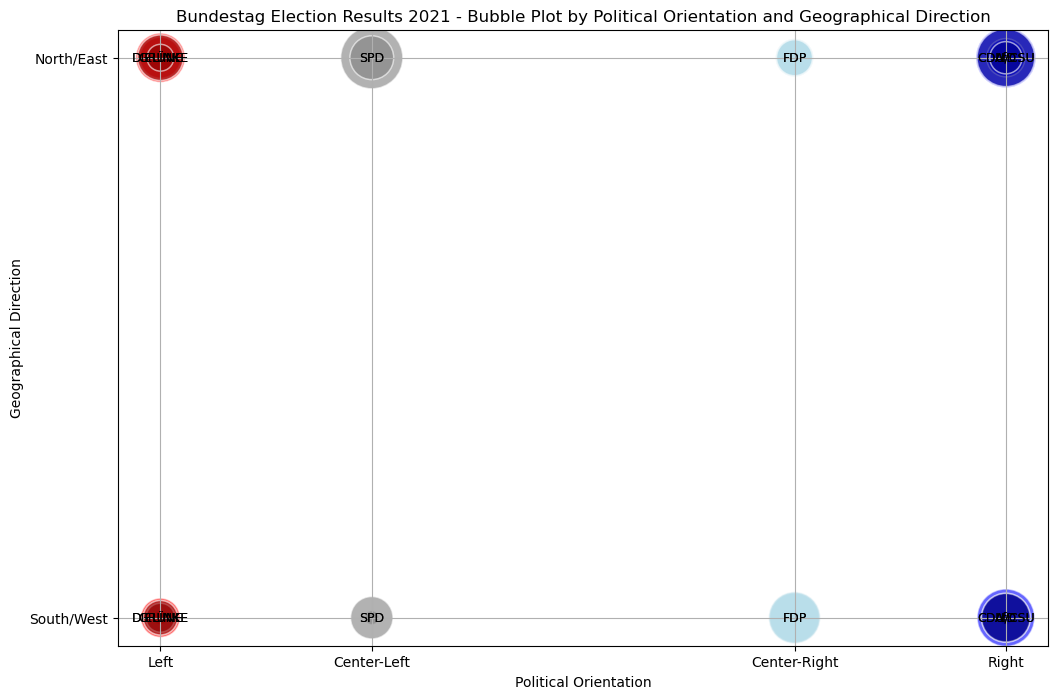

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Define the geographical direction for each Bundesland
geographical_direction = {
    'Baden-Württemberg': 'South', 'Bayern': 'South', 'Berlin': 'East', 'Brandenburg': 'East',
    'Bremen': 'North', 'Hamburg': 'North', 'Hessen': 'West', 'Mecklenburg-Vorpommern': 'East',
    'Niedersachsen': 'North', 'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West',
    'Saarland': 'West', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Schleswig-Holstein': 'North',
    'Thüringen': 'East'
}

# Assign geographical direction to the data
data['Geographical_Direction'] = data['Bundesland'].map(geographical_direction)

# Select only relevant columns (party votes) before aggregation
data_numeric = data[['Bundesland', 'CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE', 'Geographical_Direction']]

# Convert relevant columns to numeric (if not already)
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Aggregate votes by geographical direction
aggregated_data = data_numeric.groupby('Geographical_Direction').sum()

# Transform the data to long format for plotting
long_data = aggregated_data.reset_index().melt(id_vars='Geographical_Direction', var_name='Party', value_name='Votes')

# Exclude 'Bundesland' from party names
long_data = long_data[long_data['Party'] != 'Bundesland']

# Define political orientation and colors
party_orientation = {
    'CDU/CSU': ('right', 'blue'), 'SPD': ('center-left', 'grey'), 'GRÜNE': ('left', 'red'),
    'FDP': ('center-right', 'lightblue'), 'AfD': ('right', 'darkblue'), 'DIELINKE': ('left', 'darkred')
}

# Check for discrepancies in party names
missing_parties = set(long_data['Party'].unique()) - set(party_orientation.keys())
print(f"Missing parties in the orientation dictionary: {missing_parties}")

# Manually correct any discrepancies
long_data['Party'] = long_data['Party'].str.strip()

# Map political orientation and colors to the data
long_data['Orientation'] = long_data['Party'].map(lambda x: party_orientation[x][0])
long_data['Color'] = long_data['Party'].map(lambda x: party_orientation[x][1])

# Coordinates for plotting based on political orientation
orientation_coords = {
    'left': (-1, 0), 'center-left': (-0.5, 0), 'center-right': (0.5, 0), 'right': (1, 0)
}
long_data['X'] = long_data['Orientation'].map(lambda x: orientation_coords[x][0])
long_data['Y'] = long_data['Geographical_Direction'].map(lambda x: 1 if x in ['North', 'East'] else -1)

# Correct the palette by defining it as a dictionary
palette = {color: color for color in long_data['Color'].unique()}

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=long_data, x='X', y='Y', size='Votes', hue='Color', palette=palette,
                sizes=(100, 2000), legend=False, alpha=0.6)

# Add annotations
for index, row in long_data.iterrows():
    plt.text(row['X'], row['Y'], row['Party'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.xlabel('Political Orientation')
plt.ylabel('Geographical Direction')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Political Orientation and Geographical Direction')
plt.xticks([-1, -0.5, 0.5, 1], ['Left', 'Center-Left', 'Center-Right', 'Right'])
plt.yticks([-1, 1], ['South/West', 'North/East'])
plt.grid(True)

# Show plot
plt.show()


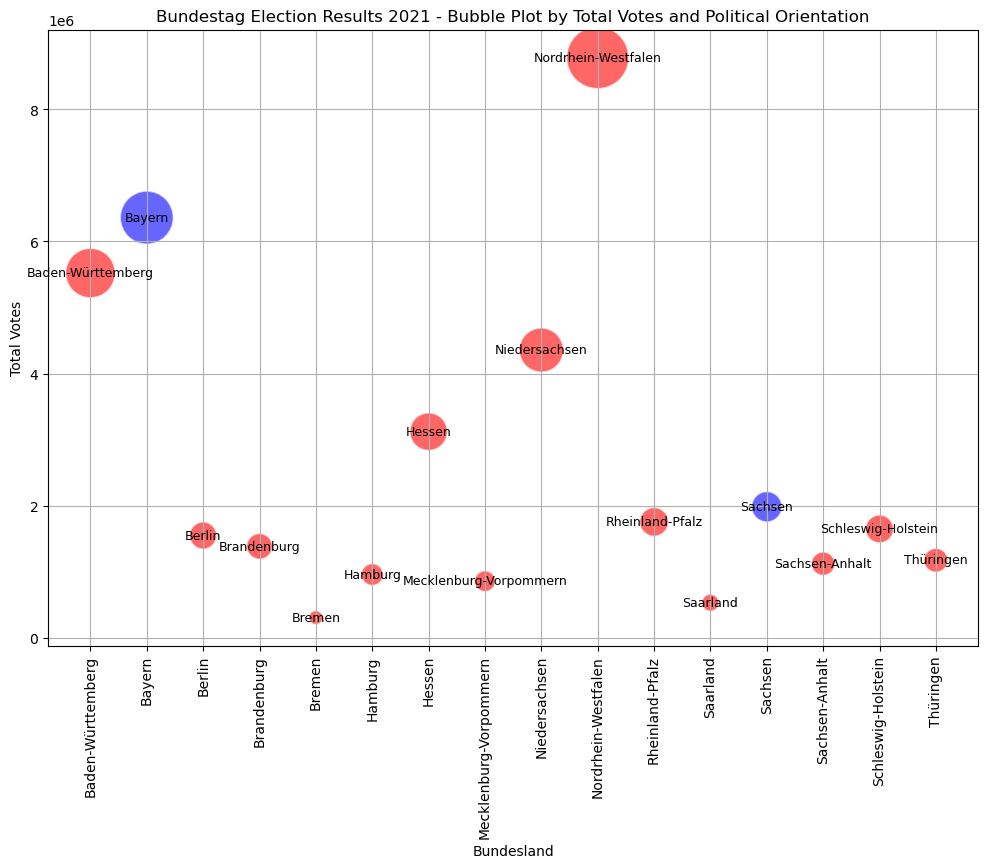

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Bundesland', y='Total_Votes', size='Total_Votes', hue='Color',
                sizes=(100, 2000), legend=False, alpha=0.6, palette=['red', 'blue'])

# Add annotations
for index, row in data.iterrows():
    plt.text(index, row['Total_Votes'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.xlabel('Bundesland')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Total Votes and Political Orientation')
plt.xticks(rotation=90)
plt.grid(True)

# Show plot
plt.show()



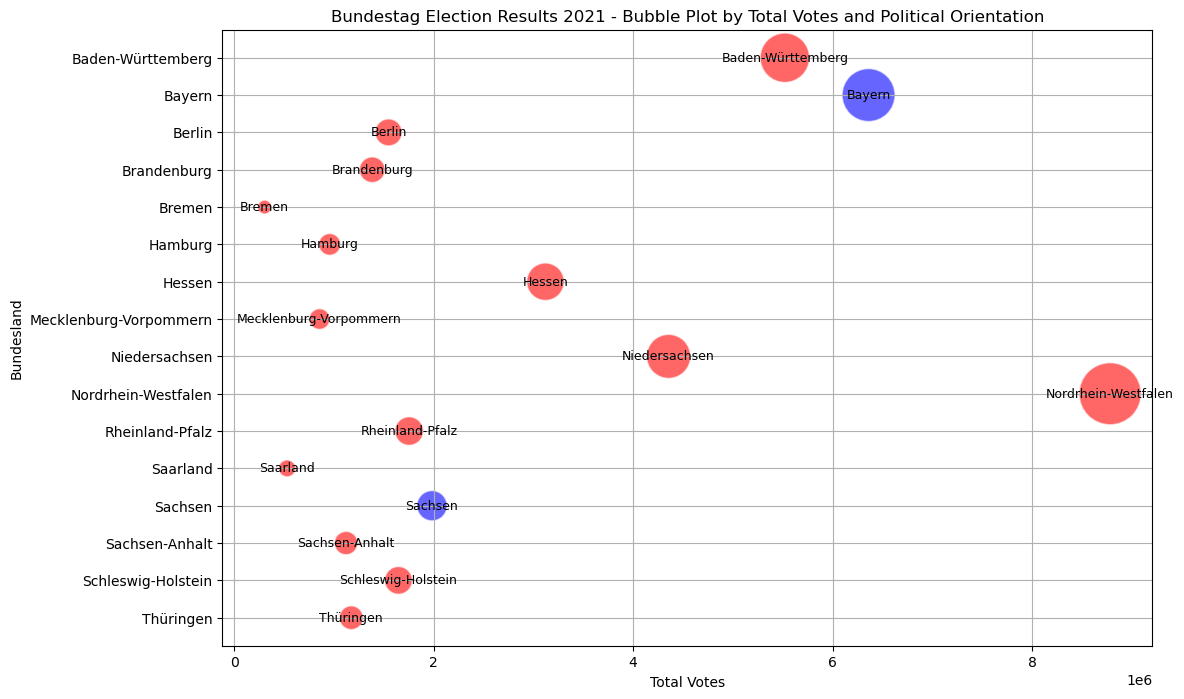

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', size='Total_Votes', hue='Color',
                sizes=(100, 2000), legend=False, alpha=0.6, palette=['red', 'blue'])

# Add annotations
for index, row in data.iterrows():
    plt.text(row['Total_Votes'], index, row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


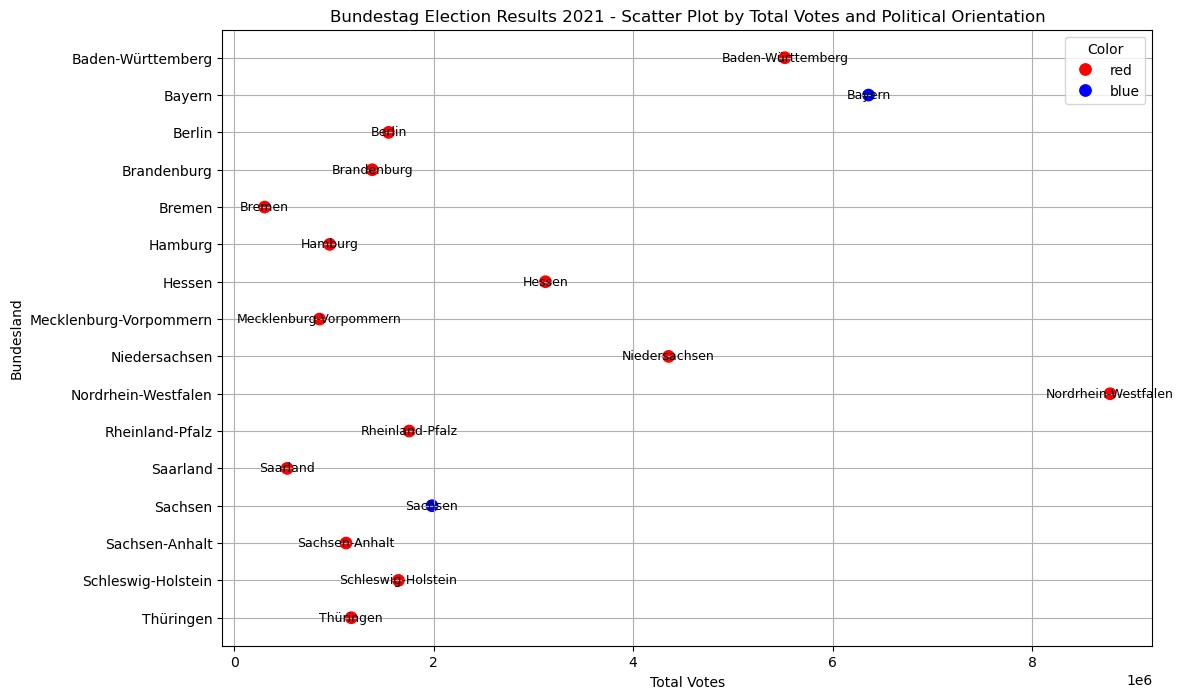

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', hue='Color', palette=['red', 'blue'], s=100)

# Add annotations
for index, row in data.iterrows():
    plt.text(row['Total_Votes'], index, row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Scatter Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


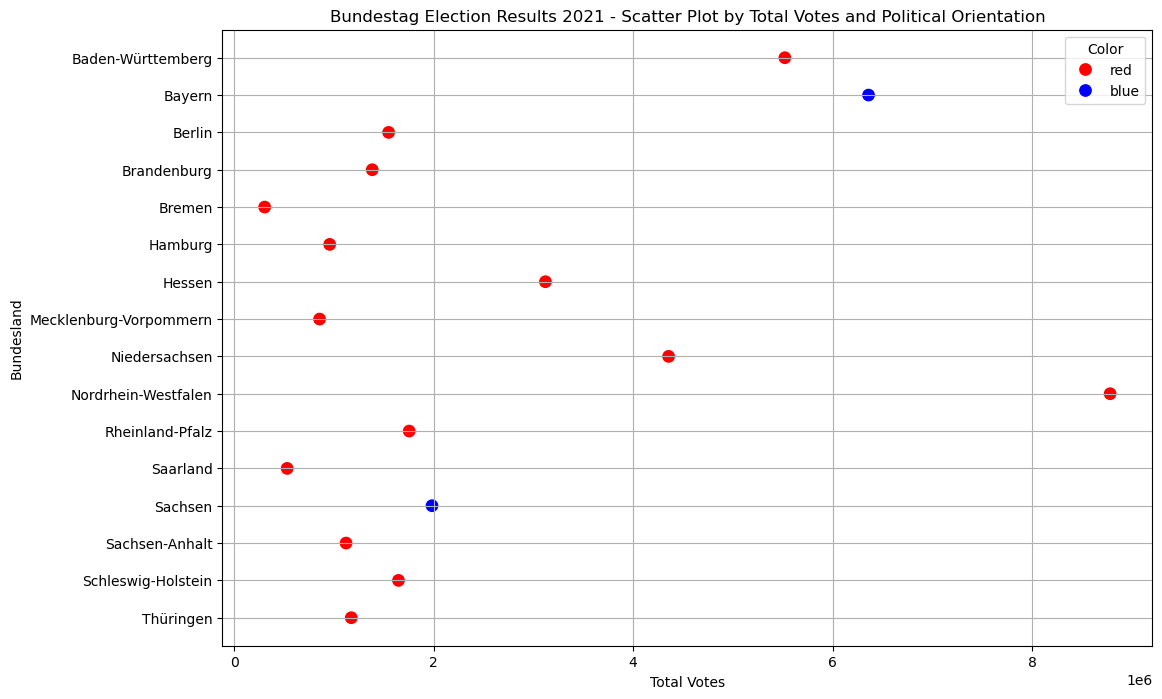

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', hue='Color', palette=['red', 'blue'], s=100)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Scatter Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()

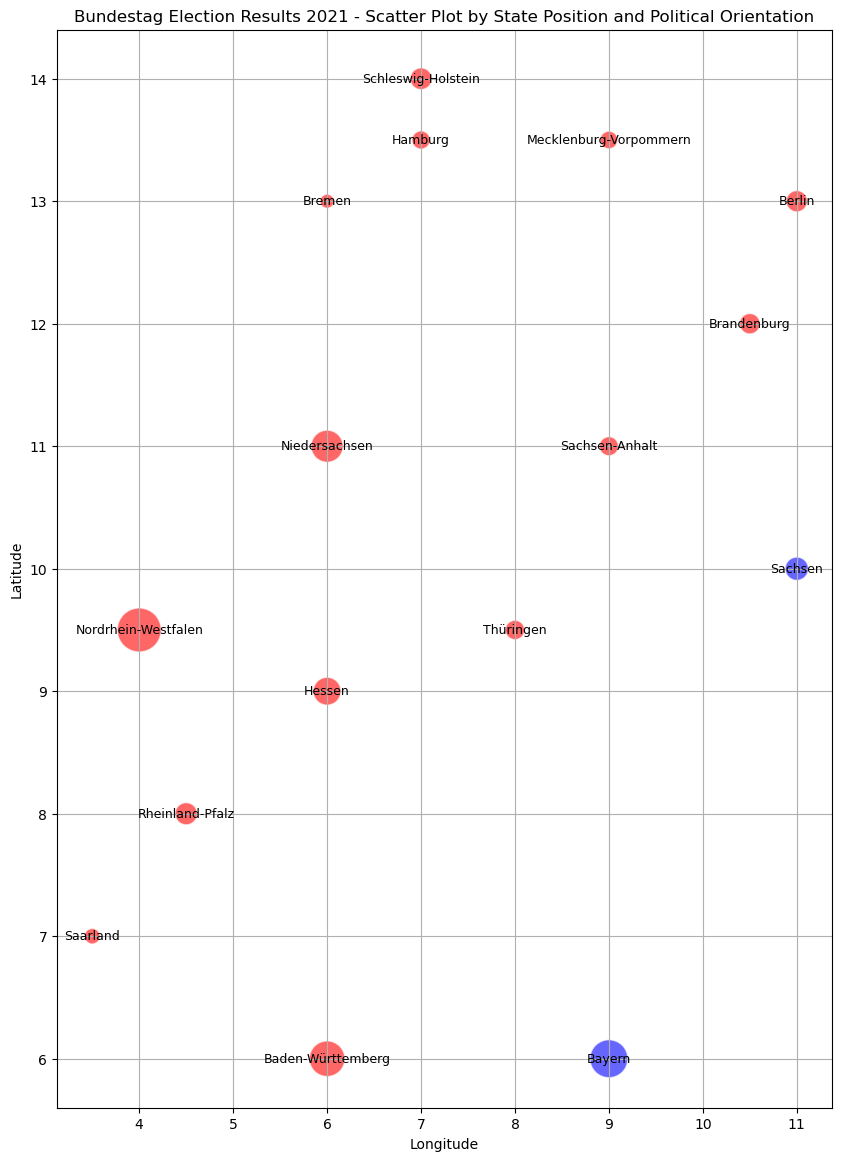

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(data=data, x='X', y='Y', hue='Color', palette=['red', 'blue'], size='Total_Votes', sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for index, row in data.iterrows():
    plt.text(row['X'], row['Y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Print the column names to verify and adjust them if necessary
print(data.columns)

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
data['Weighted_Score'] = (data['DIELINKE'] * party_weights['DIELINKE'] +
                          data['GRÜNE'] * party_weights['GRÜNE'] +
                          data['SPD'] * party_weights['SPD'] +
                          data['FDP'] * party_weights['FDP'] +
                          data['CDU/CSU'] * (party_weights['CDU'] + party_weights['CSU']) / 2 +
                          data['AfD'] * party_weights['AfD']) / data[['DIELINKE', 'GRÜNE', 'SPD', 'FDP', 'CDU/CSU', 'AfD']].sum(axis=1)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from red to blue
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
data['Color'] = data['Normalized_Score'].map(lambda x: sm.to_rgba(x))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
colors = [sm.to_rgba(score) for score in data['Normalized_Score']]
sns.scatterplot(data=data, x='X', y='Y', hue='Normalized_Score', palette=colors, size='Total_Votes', sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for index, row in data.iterrows():
    plt.text(row['X'], row['Y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


Index(['Bundesland', 'Prozente', 'GueltigeWaelende', 'CDU/CSU', 'SPD', 'GRÜNE',
       'FDP', 'AfD', 'DIELINKE', 'Unnamed: 9'],
      dtype='object')


ValueError: Could not interpret value `Total_Votes` for `size`. An entry with this name does not appear in `data`.

<Figure size 1000x1400 with 0 Axes>

/tmp/ipykernel_61735/4283704068.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())


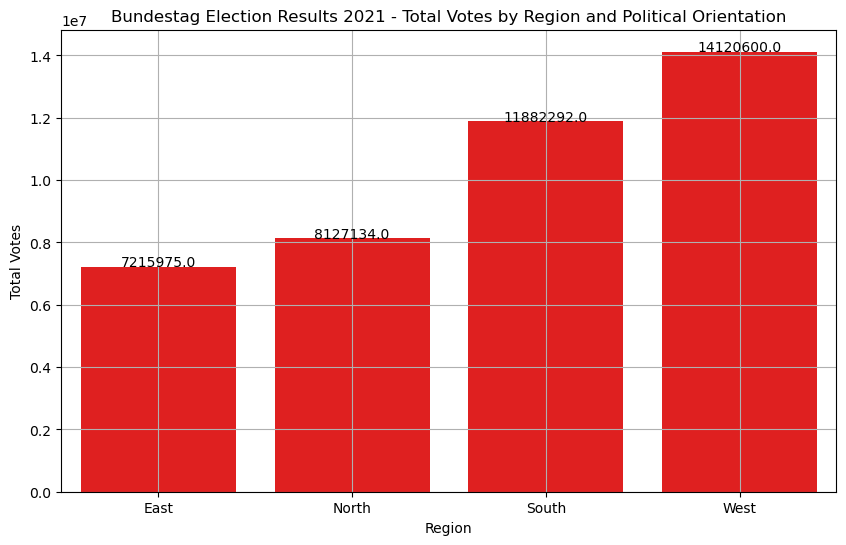

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine the region for each state
regions = {
    'Schleswig-Holstein': 'North', 'Hamburg': 'North', 'Bremen': 'North', 'Niedersachsen': 'North', 'Mecklenburg-Vorpommern': 'North',
    'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West', 'Saarland': 'West', 'Hessen': 'West',
    'Berlin': 'East', 'Brandenburg': 'East', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Thüringen': 'East',
    'Bayern': 'South', 'Baden-Württemberg': 'South'
}

data['Region'] = data['Bundesland'].map(regions)

# Aggregate votes by region
region_data = data.groupby('Region').sum()

# Determine bar color based on more votes for right-leaning parties
region_data['Color'] = region_data['Right_Votes'] > (region_data['Total_Votes'] / 2)
region_data['Color'] = region_data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())

# Add values on bars
for index, row in region_data.iterrows():
    barplot.text(index, row['Total_Votes'], round(row['Total_Votes'], 2), color='black', ha="center")

plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Total Votes by Region and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_61735/113154549.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())


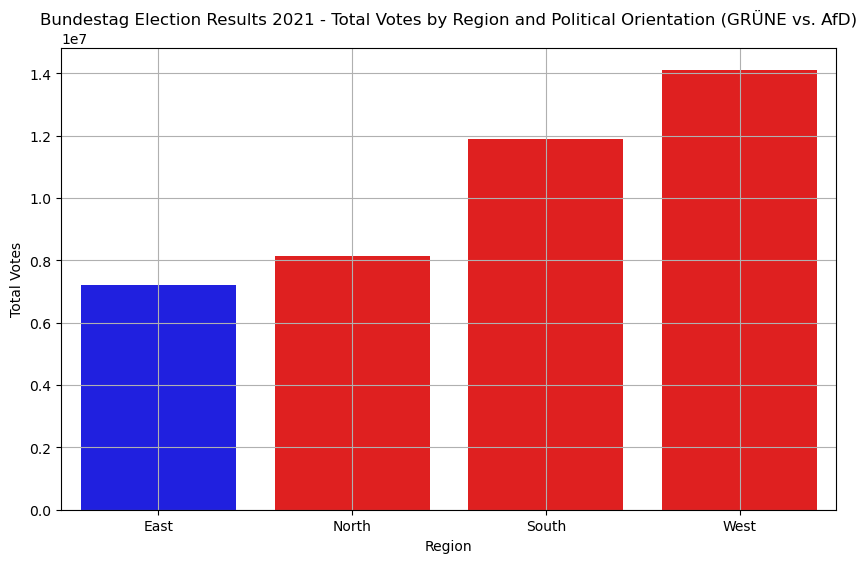

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define regions
regions = {
    'Schleswig-Holstein': 'North', 'Hamburg': 'North', 'Bremen': 'North', 'Niedersachsen': 'North', 'Mecklenburg-Vorpommern': 'North',
    'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West', 'Saarland': 'West', 'Hessen': 'West',
    'Berlin': 'East', 'Brandenburg': 'East', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Thüringen': 'East',
    'Bayern': 'South', 'Baden-Württemberg': 'South'
}

data['Region'] = data['Bundesland'].map(regions)

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)

# Aggregate votes by region
region_data = data.groupby('Region').sum()

# Determine bar color based on more votes for GRÜNE than AfD
region_data['Color'] = region_data['GRÜNE'] > region_data['AfD']
region_data['Color'] = region_data['Color'].map({True: 'red', False: 'blue'})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())

plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Total Votes by Region and Political Orientation (GRÜNE vs. AfD)')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_1698/446999949.py:73: UserWarning: The palette list has more values (16) than needed (7), which may not be intended.
  sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette=data['Color'], size=scores.sum(axis=0), sizes=(100, 1000), legend=False, alpha=0.6)


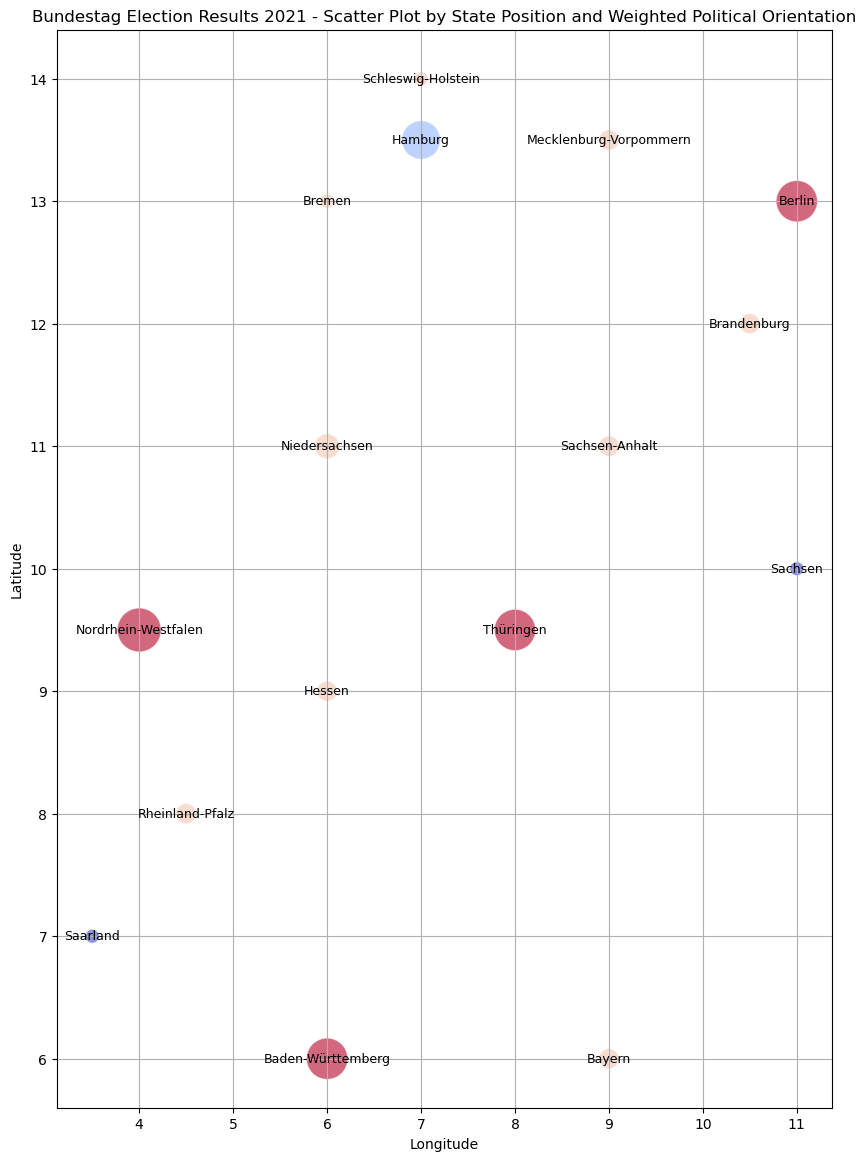

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRUENE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Simulated data for each state (in millions for simplicity)
data = {
    'Bundesland': ['Schleswig-Holstein', 'Hamburg', 'Bremen', 'Niedersachsen', 'Mecklenburg-Vorpommern',
                   'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Hessen', 'Berlin', 'Brandenburg',
                   'Sachsen', 'Sachsen-Anhalt', 'Thüringen', 'Bayern', 'Baden-Württemberg'],
    'DIELINKE': [0.1, 0.2, 0.1, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.3],
    'GRUENE': [0.5, 0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.6],
    'SPD': [0.7, 0.8, 0.7, 0.6, 0.7, 0.8, 0.7, 0.6, 0.7, 0.8, 0.7, 0.6, 0.7, 0.8, 0.7, 0.8],
    'FDP': [0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4],
    'CDU/CSU': [1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.0, 1.1],
    'AfD': [0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.8, 0.9]
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRUENE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRUENE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - min(data['Weighted_Score'])) / (max(data['Weighted_Score']) - min(data['Weighted_Score'])) * 10

# Define a colormap from red to blue
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = [coordinates[state] for state in data['Bundesland']]
data['X'], data['Y'] = zip(*data['Coordinates'])

# Plotting
plt.figure(figsize=(10, 14))
norm = plt.Normalize(min(data['Normalized_Score']), max(data['Normalized_Score']))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
data['Color'] = [sm.to_rgba(score) for score in data['Normalized_Score']]

sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette=data['Color'], size=scores.sum(axis=0), sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


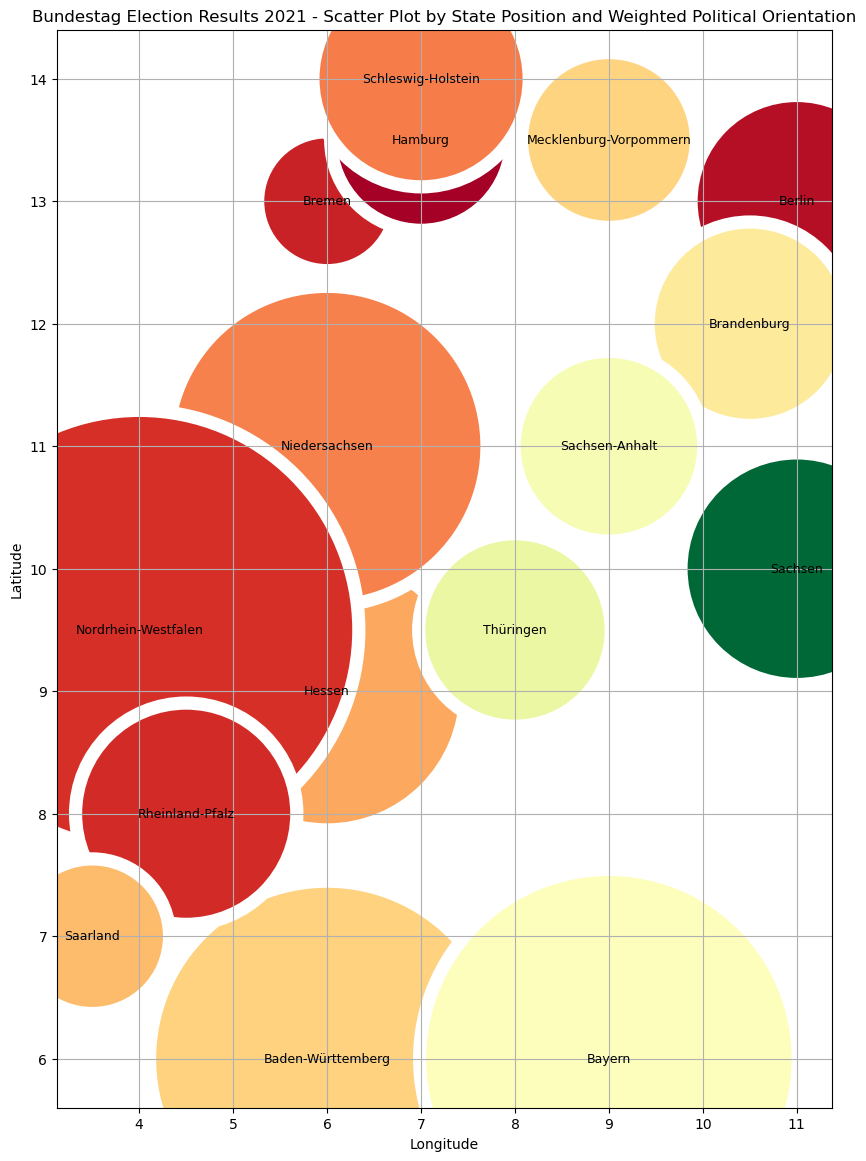

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from red to blue
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='coolwarm', size=scores.sum(axis=0), sizes=(10000, 100000), legend=False, alpha=0.6)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


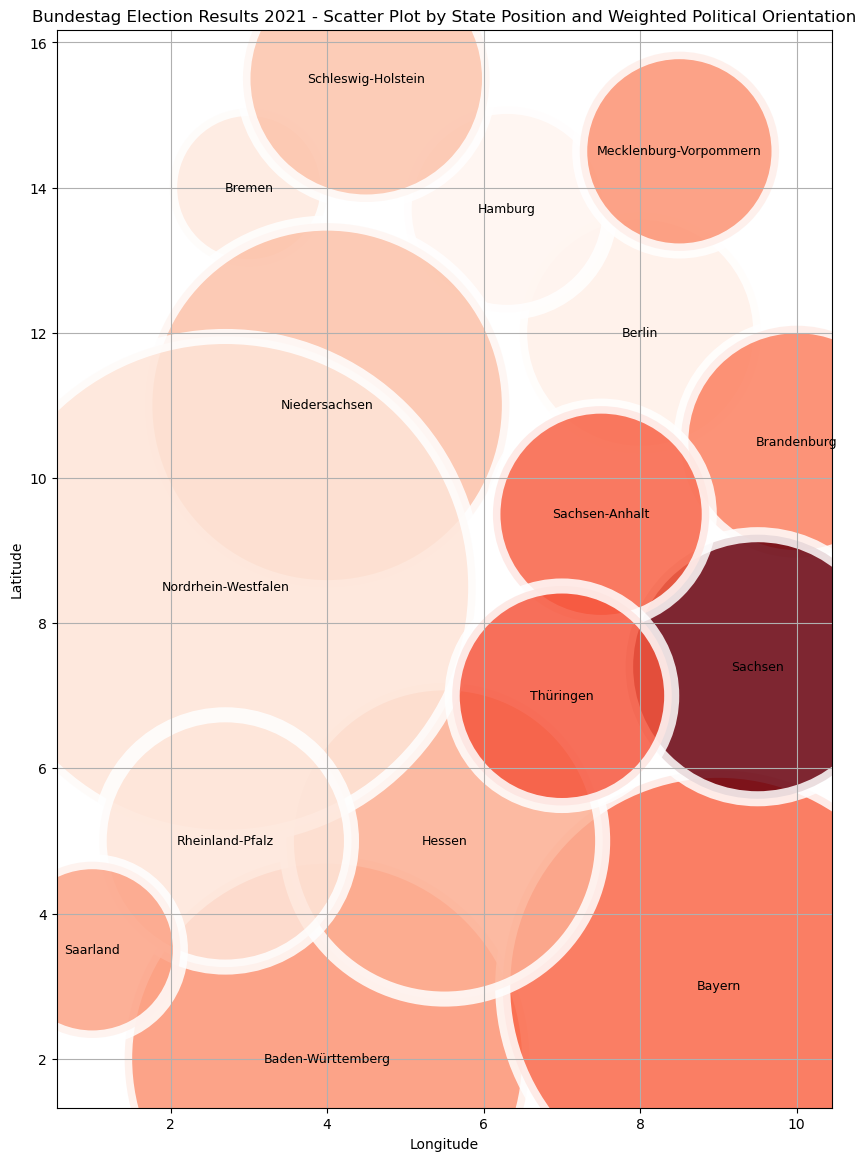

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1,3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='Reds', size=scores.sum(axis=0), sizes=(13000,130000), legend=False, alpha=0.85)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


TEXT:
Die größe der Bubbles sind nicht nach geographischer größe, sondern nach Einwohner/Stimmen
man sieht das im Osten eher rechts gewählt wird {GRUND}
Großstädte wie Berlin oder Hamburg sind eher links {GRUND}

Bayern eher rechts obwohl BRD, weil aber CSU sehr beliebt ist

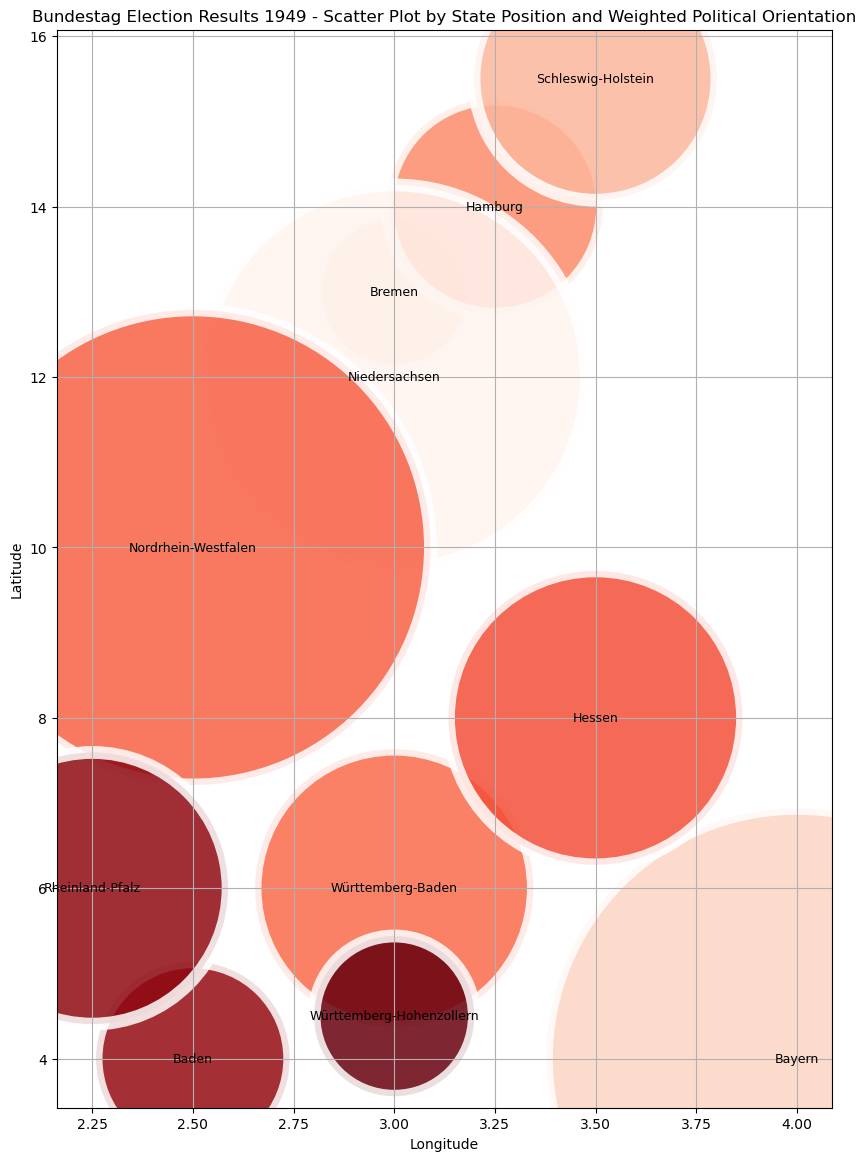

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset for 1949
data_1949 = pd.read_csv("./hdata1949.csv")

# Clean column names
data_1949.columns = data_1949.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'FDP', 'KPD', 'Sonstige']:
    data_1949[col] = data_1949[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights_1949 = {
    'Sonstige': 1.5,
    'KPD': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU/CSU': 5.3
}

# Calculate the weighted score for each state
weights_1949 = np.array([party_weights_1949['Sonstige'], party_weights_1949['KPD'], party_weights_1949['SPD'], 
                         party_weights_1949['FDP'], party_weights_1949['CDU/CSU']])
scores_1949 = np.array([data_1949['Sonstige'], data_1949['KPD'], data_1949['SPD'], data_1949['FDP'], data_1949['CDU/CSU']])

data_1949['Weighted_Score'] = np.dot(weights_1949, scores_1949) / scores_1949.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data_1949['Normalized_Score'] = (data_1949['Weighted_Score'] - data_1949['Weighted_Score'].min()) / (data_1949['Weighted_Score'].max() - data_1949['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap_1949 = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm_1949 = plt.Normalize(data_1949['Normalized_Score'].min(), data_1949['Normalized_Score'].max())
data_1949['Color'] = data_1949['Normalized_Score'].map(lambda x: cmap_1949(norm_1949(x)))

# Define approximate coordinates for each state based on the 1949 Germany map
coordinates_1949 = {
    'Schleswig-Holstein': (3.5, 15.5),
    'Hamburg': (3.25, 14),
    'Bremen': (3.0, 13),
    'Niedersachsen': (3, 12),
    'Nordrhein-Westfalen': (2.5, 10),
    'Rheinland-Pfalz': (2.25, 6),
    'Saarland': (0, 3.5),
    'Hessen': (3.5, 8),
    'Berlin': (7, 12),
    'Brandenburg': (9, 10.5),
    'Sachsen': (8.5, 7.4),
    'Sachsen-Anhalt': (6.5, 9.5),
    'Thüringen': (6, 7),
    'Bayern': (4.0, 4),  # Adjusted x value to move Bayern closer to Württemberg-Baden
    'Baden': (2.5, 4),
    'Württemberg-Baden': (3.0, 6),
    'Württemberg-Hohenzollern': (3, 4.5)
}

# Add coordinates to the data
data_1949['Coordinates'] = data_1949['Bundesland'].map(coordinates_1949)
data_1949[['X', 'Y']] = pd.DataFrame(data_1949['Coordinates'].tolist(), index=data_1949.index)

# Adjust the size for Bayern and Nordrhein-Westfalen specifically
sizes = scores_1949.sum(axis=0)
sizes[data_1949['Bundesland'] == 'Bayern'] *= 1.5  # Increase size for Bayern
sizes[data_1949['Bundesland'] == 'Nordrhein-Westfalen'] *= 0.75  # Decrease size for Nordrhein-Westfalen

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data_1949['X'], y=data_1949['Y'], hue=data_1949['Normalized_Score'], palette='Reds', size=sizes, sizes=(13000, 130000), legend=False, alpha=0.85)

# Add state names as annotations
for i, row in enumerate(data_1949['Bundesland']):
    plt.text(data_1949['X'][i], data_1949['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 1949 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


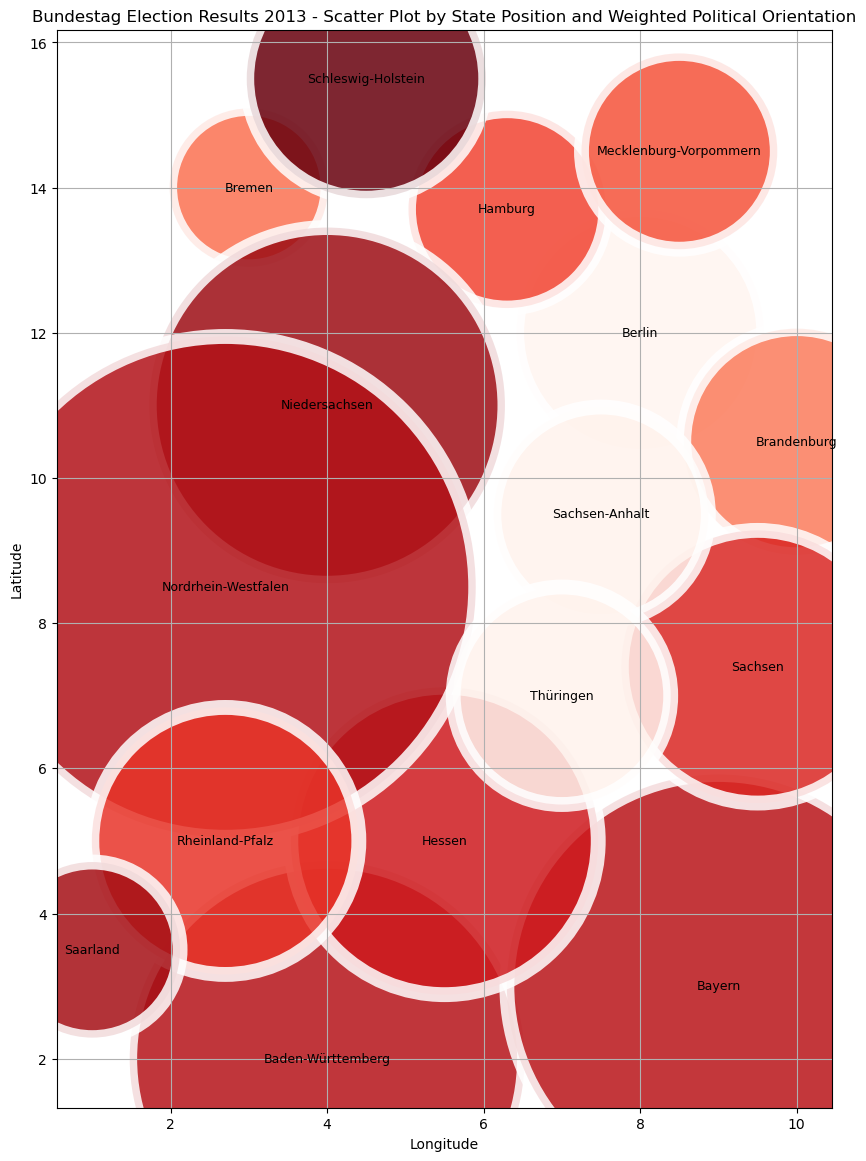

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('./hdata2013.csv')

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
numeric_cols = ['GueltigeWaelende', 'CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIE LINKE']
for col in numeric_cols:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Check for missing values and fill them with 0
data.fillna(0, inplace=True)

# Define weights for each party
party_weights = {
    'DIE LINKE': 1,
    'GRÜNE': 2,
    'SPD': 4,
    'FDP': 3.5,
    'CDU/CSU': 5,
    'AfD': 9
}

# Calculate the weighted score for each state, considering the valid voters
weights = np.array([party_weights[party] for party in numeric_cols[1:]])
scores = np.array([data[party] for party in numeric_cols[1:]])

# Adjusting the calculation to consider the number of valid voters ('GueltigeWaehler')
data['Weighted_Score'] = np.dot(weights.T, scores) / data['GueltigeWaelende']

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].apply(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map and add to the data
coordinates = {'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1,3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Assuming 'coordinates' is correctly defined somewhere above this line

# Map 'Bundesland' to 'Coordinates'
# Correctly map 'Bundesland' to 'Coordinates'
data['Coordinates'] = data['Bundesland'].map(coordinates)

# Correctly split 'Coordinates' into 'X' and 'Y'
data['X'] = data['Coordinates'].apply(lambda x: x[0])
data['Y'] = data['Coordinates'].apply(lambda x: x[1])

# Ensure 'GueltigeWaelende' is correctly processed for plotting
# Assuming 'GueltigeWaelende' needs to be a numeric value, ensure it's correctly converted
data['GueltigeWaelende'] = pd.to_numeric(data['GueltigeWaelende'], errors='coerce').fillna(0)

# Continue with your plotting as before
plt.figure(figsize=(10, 14))
sns.scatterplot(x='X', y='Y', hue='Normalized_Score', palette='Reds', size='GueltigeWaelende', sizes=(13000,130000), data=data, legend=False, alpha=0.85)

# Add state names as annotations
for i, row in data.iterrows():
    plt.text(row['X'], row['Y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2013 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()

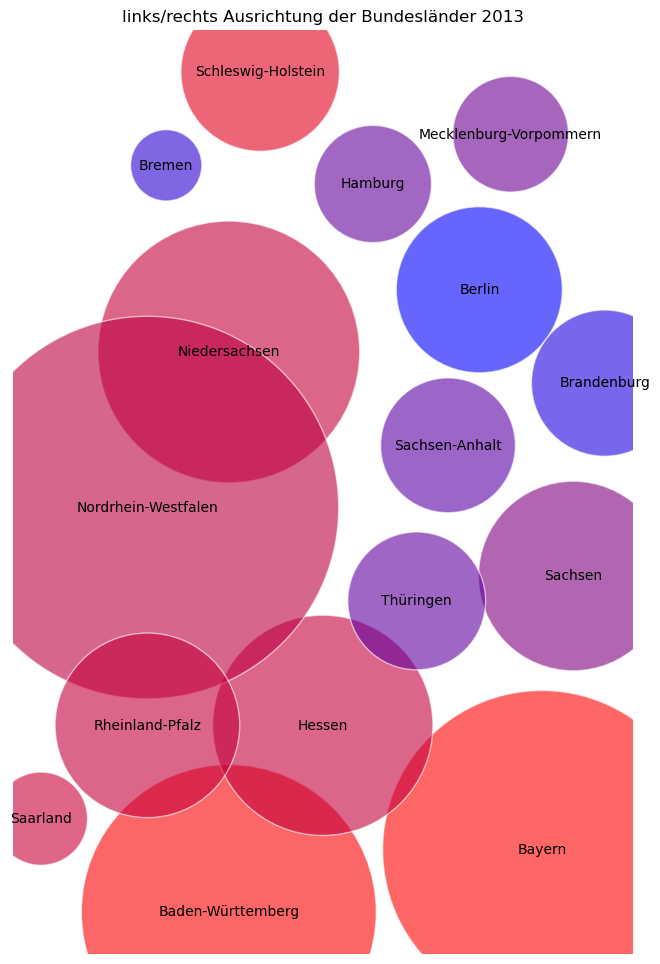

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIE LINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata2013.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIE LINKE'] * weights['DIE LINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from green to red (darker red indicates higher weighting)
colors = ["#0000ff", "#ff0000"]  # Blue to Red
colormap_blue_to_red = mcolors.LinearSegmentedColormap.from_list("custom_blue_red", colors)

# Calculate the new colors based on total adjusted weighting using the new colormap
total_adjusted_colors = colormap_blue_to_red(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 10000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Erstellung des Bubbleplots
plt.figure(figsize=(8, 12))
plt.scatter(data['x'], data['y'], s=bubble_sizes*40, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsen und Beschriftungen
plt.xlabel('Geographische Breite')
plt.ylabel('Geographische Länge')
plt.title('links/rechts Ausrichtung der Bundesländer 2013')
plt.grid(False)
plt.axis('off')

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')


plt.show()

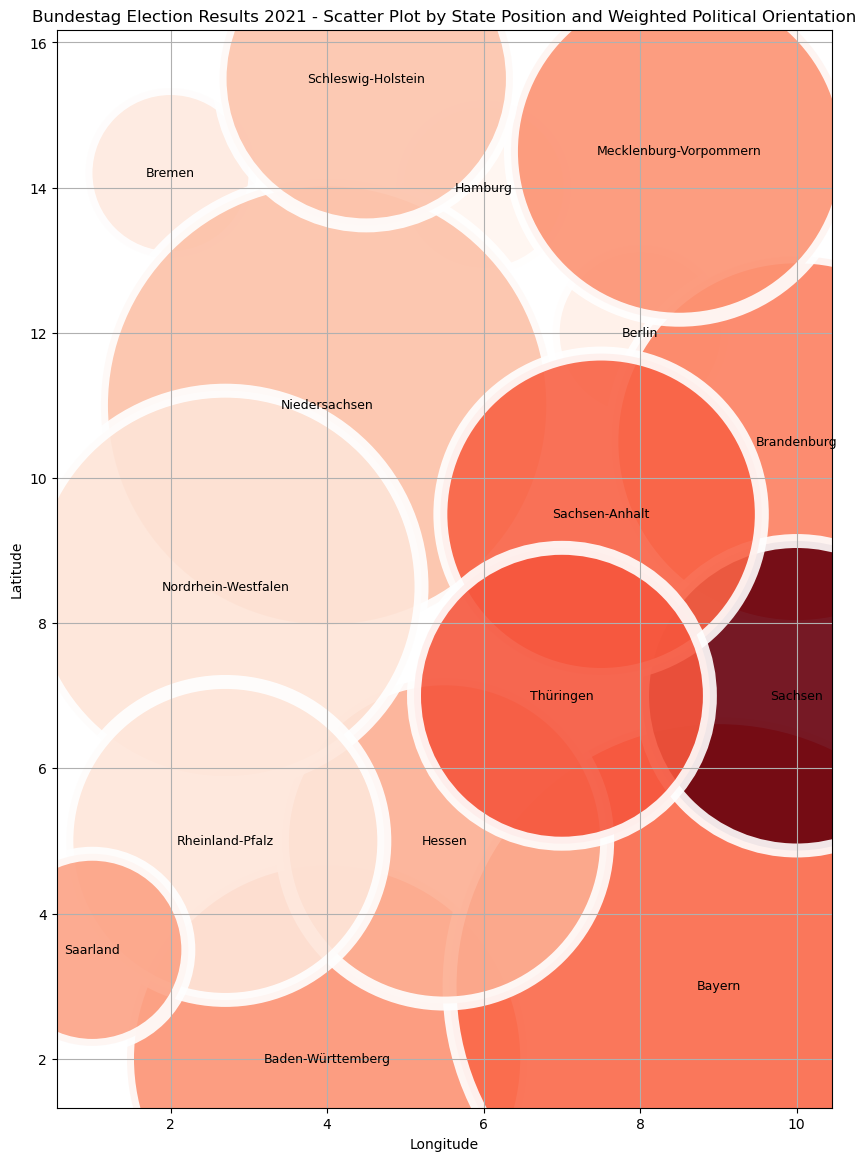

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6, 14),
    'Bremen': (2, 14.2),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1,3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (10, 7),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Define geographic sizes for each state
state_areas = {
    'Schleswig-Holstein': 15800,
    'Hamburg': 755,
    'Bremen': 419,
    'Niedersachsen': 47709,
    'Mecklenburg-Vorpommern': 23180,
    'Nordrhein-Westfalen': 34084,
    'Rheinland-Pfalz': 19854,
    'Saarland': 2571,
    'Hessen': 21115,
    'Berlin': 891,
    'Brandenburg': 29654,
    'Sachsen': 18416,
    'Sachsen-Anhalt': 20451,
    'Thüringen': 16202,
    'Bayern': 70542,
    'Baden-Württemberg': 35751
}

# Add state sizes to the data
data['State_Size'] = data['Bundesland'].map(state_areas)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='Reds', size=data['State_Size'], sizes=(15000, 150000), legend=False, alpha=0.9)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()
